In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("survey_results_public.csv")
df_schema = pd.read_csv("survey_results_schema.csv")
df.describe()

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
count,51392.000000,42695.000000,40376.000000,20600.000000,36592.000000,12891.000000,2566.000000
mean,25696.500000,7.300574,6.957078,3.952282,8.429875,56298.480641,33142.220468
std,14835.736854,1.955444,2.167652,7.564722,1.390635,39880.905277,30162.988829
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12848.750000,6.000000,6.000000,1.000000,8.000000,26440.371839,4490.492484
50%,25696.500000,8.000000,7.000000,1.000000,9.000000,50000.000000,29364.263691
75%,38544.250000,9.000000,8.000000,4.000000,10.000000,80000.000000,50403.225806
max,51392.000000,10.000000,10.000000,40.000000,10.000000,197000.000000,187500.000000


In [3]:
for a in df.columns:
    print(a)

Respondent
Professional
ProgramHobby
Country
University
EmploymentStatus
FormalEducation
MajorUndergrad
HomeRemote
CompanySize
CompanyType
YearsProgram
YearsCodedJob
YearsCodedJobPast
DeveloperType
WebDeveloperType
MobileDeveloperType
NonDeveloperType
CareerSatisfaction
JobSatisfaction
ExCoderReturn
ExCoderNotForMe
ExCoderBalance
ExCoder10Years
ExCoderBelonged
ExCoderSkills
ExCoderWillNotCode
ExCoderActive
PronounceGIF
ProblemSolving
BuildingThings
LearningNewTech
BoringDetails
JobSecurity
DiversityImportant
AnnoyingUI
FriendsDevelopers
RightWrongWay
UnderstandComputers
SeriousWork
InvestTimeTools
WorkPayCare
KinshipDevelopers
ChallengeMyself
CompetePeers
ChangeWorld
JobSeekingStatus
HoursPerWeek
LastNewJob
AssessJobIndustry
AssessJobRole
AssessJobExp
AssessJobDept
AssessJobTech
AssessJobProjects
AssessJobCompensation
AssessJobOffice
AssessJobCommute
AssessJobRemote
AssessJobLeaders
AssessJobProfDevel
AssessJobDiversity
AssessJobProduct
AssessJobFinances
ImportantBenefits
ClickyKeys
Jo

In [4]:
pd.set_option("display.max_colwidth", 300)
pd.set_option("display.max_rows", 101)
df_schema[df_schema["Column"] == "JobSatisfaction"]["Question"]

19    Job satisfaction rating
Name: Question, dtype: object

In [5]:
def show_CareerJobSatisfaction_AboveAverage(df, FocusCategoricalData):
    """
    input:
        df - dataframe of "survey_results_public.csv"
        FocusCategoricalData - the column (should be categorical) you would like to compare with Job/Career Satisfaction
    
    output:
        show Job/Career satisfaction of the focused categorical data
    """
    
    #FocusCategory vs "CareerSatisfaction"
    Average = df[[FocusCategoricalData, "CareerSatisfaction"]].dropna().mean()["CareerSatisfaction"]
    a = df[[FocusCategoricalData, "CareerSatisfaction"]].dropna().groupby(FocusCategoricalData).agg(np.mean)
    print(a[a["CareerSatisfaction"] > Average]["CareerSatisfaction"])
    
    #FocusCategory vs "JobSatisfaction"
    Average = df[[FocusCategoricalData, "JobSatisfaction"]].dropna().mean()["JobSatisfaction"]
    a = df[[FocusCategoricalData, "JobSatisfaction"]].dropna().groupby(FocusCategoricalData).agg(np.mean)
    print(a[a["JobSatisfaction"] > Average]["JobSatisfaction"])    

In [6]:
# If HomeRemote, CompanySize and CompanyType are bla bla bla..., Career Satisfaction, Job Satisfaction would be bla bla bla...
# Categorical Data

In_Scope = ["HomeRemote", "CompanySize", "CompanyType"]
for FocusCategoricalData in In_Scope:
    show_CareerJobSatisfaction_AboveAverage(df, FocusCategoricalData)

HomeRemote
A few days each month                                      7.477806
About half the time                                        7.467611
All or almost all the time (I'm full-time remote)          7.645147
Less than half the time, but at least one day each week    7.595121
More than half, but not all, the time                      7.377029
Name: CareerSatisfaction, dtype: float64
HomeRemote
A few days each month                                      7.077509
About half the time                                        6.973702
All or almost all the time (I'm full-time remote)          7.388430
Less than half the time, but at least one day each week    7.120125
Name: JobSatisfaction, dtype: float64
CompanySize
1,000 to 4,999 employees    7.367443
10,000 or more employees    7.397198
100 to 499 employees        7.390379
500 to 999 employees        7.377882
I prefer not to answer      7.484230
Name: CareerSatisfaction, dtype: float64
CompanySize
10 to 19 employees         7.000799
1

In [11]:
def plot_CareerJobSatisfaction_withQuantitativeData(df, FocusQuantitativeData):
    """
    input:
        df - dataframe of "survey_results_public.csv"
        FocusQuantitativeData - the column (should be numerical) you would like to compare with Job/Career Satisfaction
    
    output:
        show distribution of Job/Career satisfaction with the focused quantitative data.
        Save images under the 'image' folder
    """
    
    #FocusQuantitativeData vs "CareerSatisfaction"
    temp = df[[FocusQuantitativeData, "CareerSatisfaction"]].dropna()
    plt.scatter(temp[FocusQuantitativeData], temp["CareerSatisfaction"], s=3.6)
    plt.xlabel(FocusQuantitativeData)
    plt.ylabel("CareerSatisfaction")
    plt.show()
    #plt.savefig('image/' + FocusQuantitativeData + '_CareerSatisfaction.png') 
    plt.clf()
    
    #FocusCategory vs "JobSatisfaction"
    temp = df[[FocusQuantitativeData, "JobSatisfaction"]].dropna()
    plt.scatter(temp[FocusQuantitativeData], temp["JobSatisfaction"], s=3.6)
    plt.xlabel(FocusQuantitativeData)
    plt.ylabel("JobSatisfaction")
    plt.show()
    #plt.savefig('image/' + FocusQuantitativeData + '_JobSatisfaction.png')
    plt.clf()

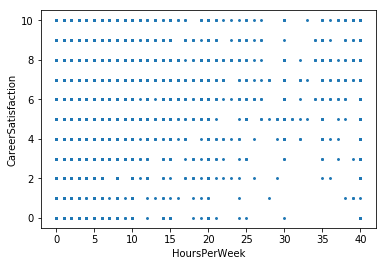

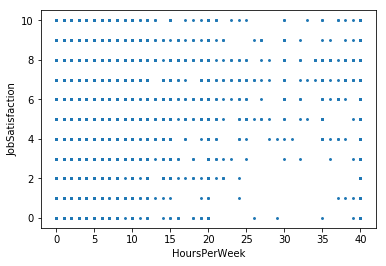

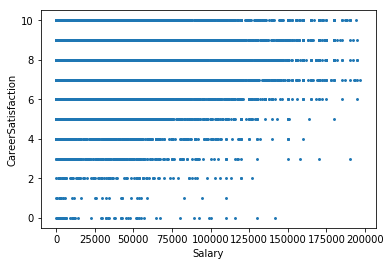

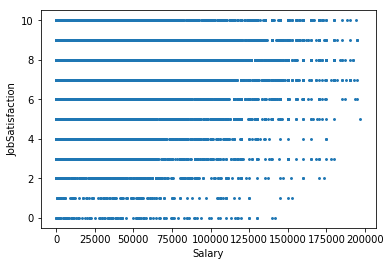

<Figure size 432x288 with 0 Axes>

In [12]:
# If HoursPerWeek, Saraly and Expected Saraly are bla bla bla..., Career Satisfaction, Job Satisfaction would be bla bla bla...
# Numerical Data

In_Scope = ["HoursPerWeek", "Salary"]
for FocusQuantitativeData in In_Scope:
    plot_CareerJobSatisfaction_withQuantitativeData(df, FocusQuantitativeData)